Assignment-4

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load the dataset into the Google Colab

In [6]:
df=pd.read_csv("./abalone.csv")

In [7]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

Univariate Analysis

array([[<AxesSubplot: title={'center': 'Length'}>,
        <AxesSubplot: title={'center': 'Diameter'}>,
        <AxesSubplot: title={'center': 'Height'}>,
        <AxesSubplot: title={'center': 'Whole weight'}>],
       [<AxesSubplot: title={'center': 'Shucked weight'}>,
        <AxesSubplot: title={'center': 'Viscera weight'}>,
        <AxesSubplot: title={'center': 'Shell weight'}>,
        <AxesSubplot: title={'center': 'age'}>]], dtype=object)

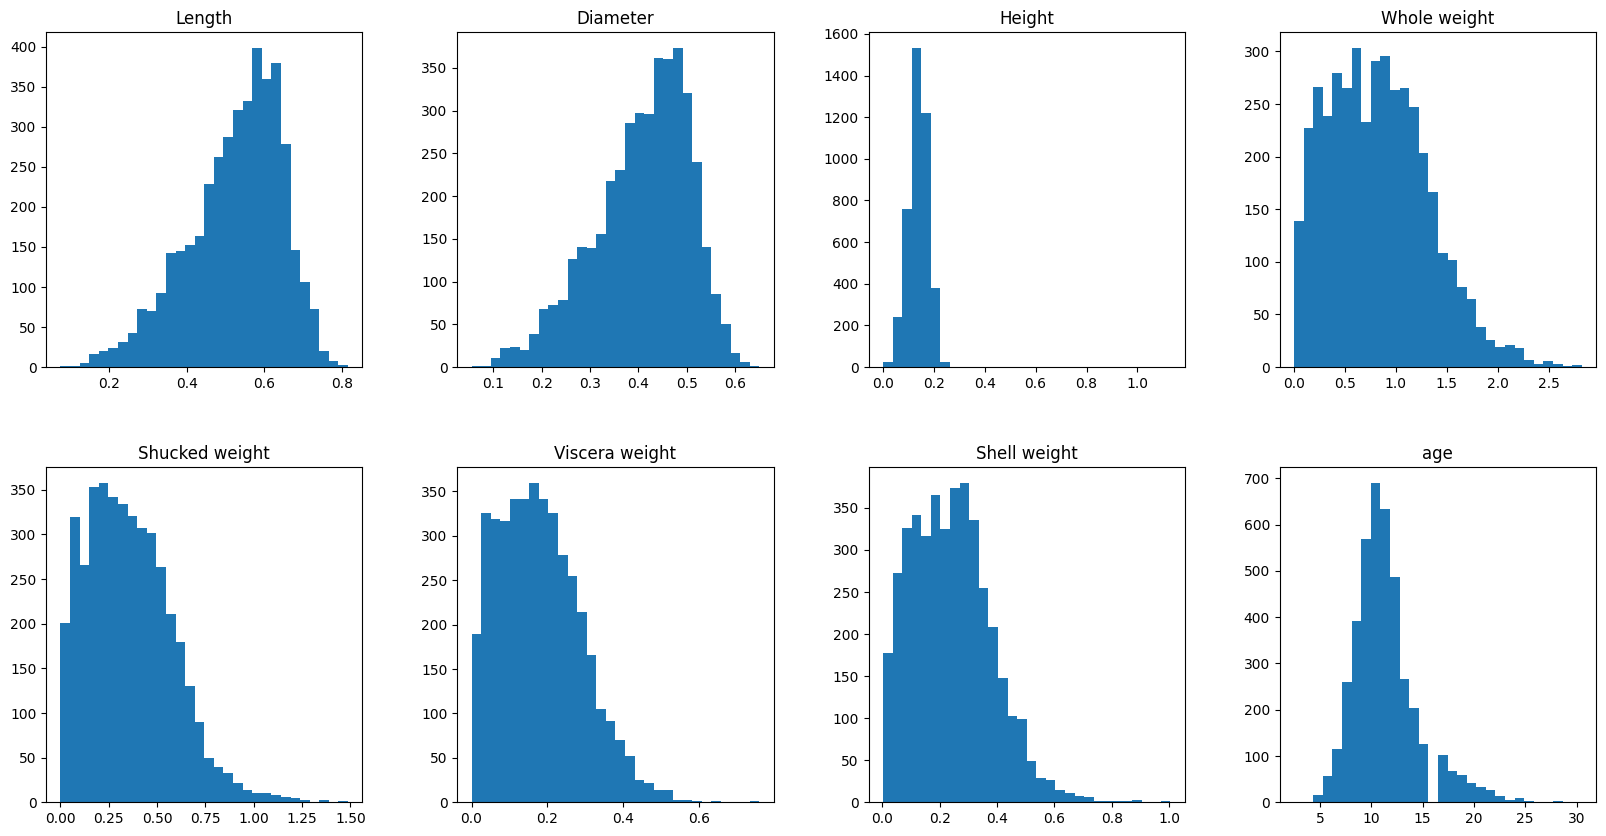

In [8]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

Bi-Variate Analysis & Multi-Variate Analysis

numerical_features = df.select_dtypes(include = [np.number]).columns
sns.pairplot(df[numerical_features])

Descriptive statistics

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Check for Missing Values

In [12]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

Find the outliers and replace them outliers

In [13]:
df = pd.get_dummies(df)
dummy_data = df.copy()

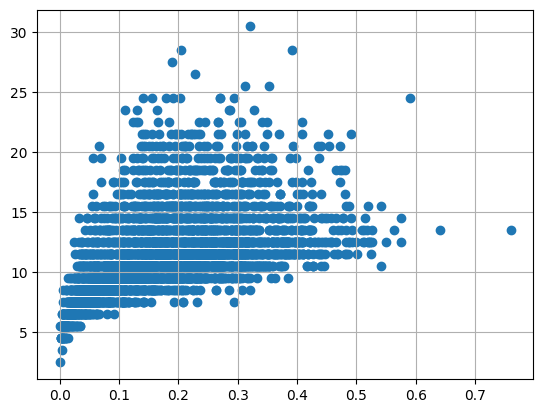

In [14]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [15]:
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

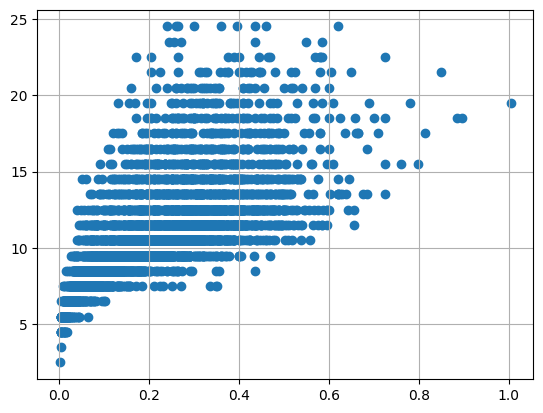

In [16]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)
#Outliers removal
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace=True)

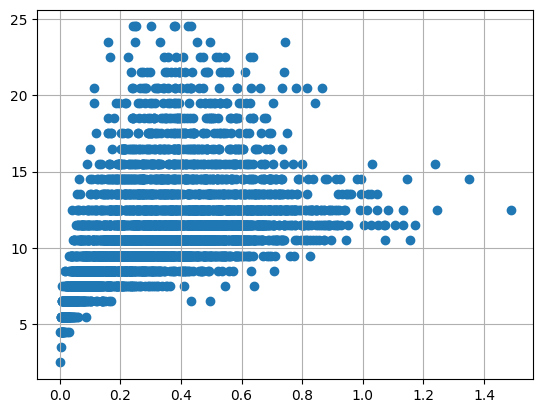

In [17]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

#Outlier removal
df.drop(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['age'] > 20)].index, inplace=True)

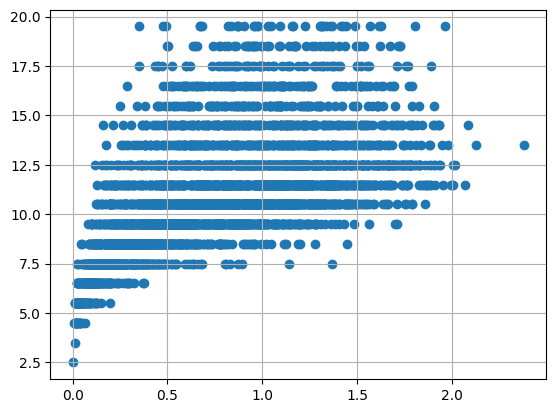

In [18]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

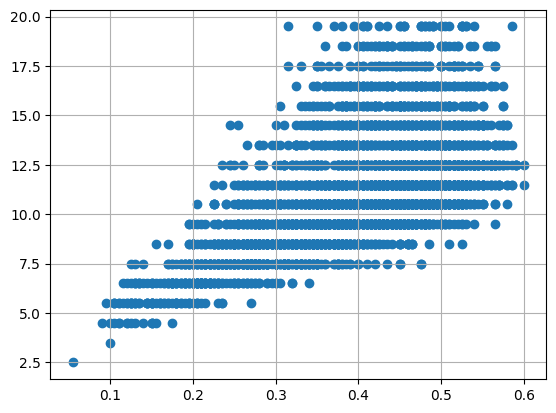

In [19]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Diameter'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['age'] < 25)].index, inplace = True)

var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)
df.drop(df[(df['Height'] > 0.4) &
          (df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['age'] > 25)].index, inplace = True)

var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)


In [22]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

/tmp/ipykernel_19400/3796453440.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include = [np.object]).columns


In [23]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [24]:
categorical_features

Index([], dtype='object')

Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(df.Length.value_counts())


0.575    93
0.625    91
0.580    89
0.550    89
0.620    83
         ..
0.220     2
0.150     1
0.755     1
0.135     1
0.760     1
Name: Length, Length: 126, dtype: int64


Split the dependent and independent variables

x=df.iloc[:,:5]
x

In [27]:
y=df.iloc[:,5:]
y

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.1010,0.1500,16.5,0,0,1
1,0.0485,0.0700,8.5,0,0,1
2,0.1415,0.2100,10.5,1,0,0
3,0.1140,0.1550,11.5,0,0,1
4,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...
4172,0.2390,0.2490,12.5,1,0,0
4173,0.2145,0.2605,11.5,0,0,1
4174,0.2875,0.3080,10.5,0,0,1
4175,0.2610,0.2960,11.5,1,0,0


Train , Test , Split

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Model building

In [29]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
mlrpred=mlr.predict(x_test[0:9])
mlrpred

array([[ 1.77474135e-01,  2.42317154e-01,  1.16752030e+01,
         3.55570598e-01,  2.81631959e-01,  3.62797442e-01],
       [ 2.41807339e-01,  3.02116209e-01,  1.15870858e+01,
         3.96518368e-01,  1.60895193e-01,  4.42586439e-01],
       [ 3.28039079e-01,  3.84305656e-01,  1.13356995e+01,
         4.45207856e-01, -3.29013356e-03,  5.58082278e-01],
       [ 2.61692879e-01,  3.09283918e-01,  1.04372404e+01,
         3.61918200e-01,  1.45299818e-01,  4.92781983e-01],
       [ 1.17478915e-01,  1.69319927e-01,  1.09111063e+01,
         2.69046476e-01,  4.27045089e-01,  3.03908435e-01],
       [ 2.52583109e-02,  4.58353833e-02,  8.60185090e+00,
         8.47182966e-02,  7.21698326e-01,  1.93583378e-01],
       [ 3.57294566e-01,  5.06957634e-01,  1.82936090e+01,
         8.22439492e-01, -3.31425420e-01,  5.08985928e-01],
       [ 3.39946554e-01,  4.25757558e-01,  1.38512956e+01,
         5.47345512e-01, -5.55577232e-02,  5.08212211e-01],
       [ 2.19559587e-01,  3.15416383e-01,  1.404

In [31]:
x_test[0:5]

,Length,Diameter,Height,Whole weight,Shucked weight
3901,0.525,0.430,0.125,0.8130,0.3315
3390,0.560,0.440,0.160,1.1115,0.5035
2703,0.680,0.530,0.180,1.5290,0.7635
1358,0.605,0.485,0.150,1.2380,0.6315
110,0.495,0.395,0.125,0.5415,0.2375


In [32]:
y_test[0:5]

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
3901,0.1660,0.1775,13.5,1,0,0
3390,0.2785,0.2600,11.5,0,0,1
2703,0.3115,0.4025,12.5,0,0,1
1358,0.2260,0.3300,12.5,0,1,0
110,0.1345,0.1550,10.5,0,0,1


Measure the performance using metrics

In [33]:
from sklearn.metrics import r2_score
r2_score(mlr.predict(x_test),y_test)

-3.4515354052119496